# Set up and import

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%run ../lib/load.py

In [4]:
path = '/Users/zhaoziqin/Desktop/train_set/'
data = load.load_data(path+'label.csv')
points_path = '/Users/zhaoziqin/Desktop/train_set/points/'
X = load.load_points(points_path,data)
y= data['emotion_idx'].to_numpy()

--- 16.21194887161255 seconds ---


# Train-test split

In [5]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=123)

In [6]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(2000, 6006)
(500, 6006)
(2000,)
(500,)


# Baseline model (GBM)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier 
start_time = time.time()
baseline = GradientBoostingClassifier(n_estimators=22,max_depth=2)
gbm_model = GradientBoostingClassifier(n_estimators=22,max_depth=2).fit(train_x,train_y) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 398.3472001552582 seconds ---


In [9]:
from sklearn.metrics import classification_report
baseline_pred = gbm_model.predict(test_x)
baseline_accuracy = gbm_model.score(test_x,test_y)
print("Accuracy on the baseline model: %.4f" % (baseline_accuracy))
print(classification_report(test_y, baseline_pred))

Accuracy on the baseline model: 0.3660
              precision    recall  f1-score   support

           1       0.43      0.50      0.46        18
           2       0.50      0.58      0.54        19
           3       0.28      0.36      0.32        25
           4       0.32      0.48      0.38        21
           5       0.71      0.56      0.63        18
           6       0.38      0.19      0.26        26
           7       0.36      0.40      0.38        20
           8       0.65      0.69      0.67        16
           9       0.47      0.28      0.35        25
          10       0.26      0.40      0.31        20
          11       0.42      0.42      0.42        24
          12       0.33      0.22      0.26        32
          13       0.08      0.08      0.08        24
          14       0.41      0.52      0.46        23
          15       0.53      0.45      0.49        22
          16       0.68      0.59      0.63        22
          17       0.36      0.46      0.4

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,baseline_pred)

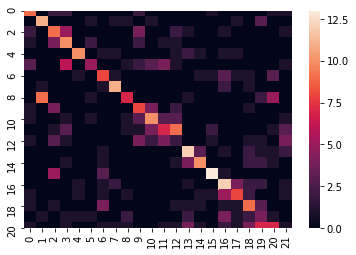

In [21]:
import seaborn as sns
sns.heatmap(cm)